In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [0, 2, 0, 0, 0] 3586.8037120000004 35.868037120000004


In [6]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 50
NUM_ITERATION = 3

# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = gr_learner.select_superarm()
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [========================      ] 80.0%

(3, 50)

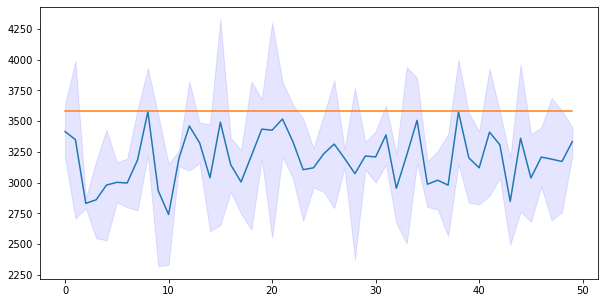

In [7]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

In [5]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
    )


In [ ]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [========================      ] 80.0%Iteration # 2
loading: [========================      ] 80.0%Iteration # 3
loading: [========================      ] 80.0%Iteration # 4
loading: [========================      ] 80.0%

In [ ]:
ucb1_learner.estimate_conversion_rates()

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner.select_superarm()
        report = environment.round(super_arm)
        ts_learner.update(super_arm.copy(), report)
    rewards = ts_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

In [ ]:
ts_learner.estimate_conversion_rates()

In [ ]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [ ]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

In [ ]:
rewards = ts_learner.history_rewards


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [ ]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

In [ ]:
rewards = ts_learner.history_rewards

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [4]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #uniform
prods_dist = np.ones((n_products,n_arms))   #all 1


customer = Customer(0,0, alpha = alphas, num_prods_distribution= prods_dist, click_graph = environment.get_aggregate_click_graph())

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb4_learner = UCBLearner4(n_arms, n_products, customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%customer alpha: [0.3 0.2 0.2 0.1 0.2]


/Users/sofia/Desktop/UNI/Quarto Anno/Secondo semestre/OLA/OLA_project/Code/MC_simulator.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  ans[primary] = 1 / c.num_prods_distributions[primary][super_arm[primary]]


KeyboardInterrupt: 

In [6]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = TSLearner4(n_arms, n_products, customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [========================      ] 80.0%

(1, 50)

In [6]:
#unknown param
c_graph = np.zeros((n_products,n_products))

customer2 = Customer(0,0, environment.get_aggregate_alphas(), environment.get_aggregate_num_prods_distribution(), click_graph=c_graph)

In [7]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customer2, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%

/Users/sofia/Desktop/UNI/Quarto Anno/Secondo semestre/OLA/OLA_project/Code/UCBLearner5.py:16: RuntimeWarning: divide by zero encountered in true_divide
  self.estimated_graph[i,:] = (self.estimated_graph[i,:] * self.n_bought + n_clicks[i,:]) / (self.n_bought + new_n_bought)
/Users/sofia/Desktop/UNI/Quarto Anno/Secondo semestre/OLA/OLA_project/Code/MC_simulator.py:41: RuntimeWarning: invalid value encountered in multiply
  ans += λ * edge_prob * dp(secondary, mask)


[[ inf 0.75 0.75 0.4  3.  ]
 [ inf 0.75 0.75 0.4  3.  ]
 [ inf 0.75 0.75 0.4  3.  ]
 [ inf 0.75 0.75 0.4  3.  ]
 [ inf 0.75 0.75 0.4  3.  ]]


TypeError: object of type 'NoneType' has no len()